In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import datetime as dt

In [8]:
df = pd.read_csv('obs_2019_2020_cured.csv', skiprows=1, delimiter=r"\s+", parse_dates=True)
for i in range(len(df['datetime'])):
    fecha = df['datetime'][i]
    try:
        df['datetime'][i] = dt.datetime.strptime(fecha, "%Y-%m-%dT%H:%M:%S")
    except ValueError:
        fecha = df['datetime'][i]
        fecha = fecha.replace('T24', 'T23')
        fecha  = dt.datetime.strptime(fecha, "%Y-%m-%dT%H:%M:%S")
        df['datetime'][i] = fecha + dt.timedelta(hours=1)

df.index = pd.to_datetime(df['datetime'])
display(df)

<ipython-input-8-edb9367e641c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'][i] = fecha + dt.timedelta(hours=1)
<ipython-input-8-edb9367e641c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'][i] = dt.datetime.strptime(fecha, "%Y-%m-%dT%H:%M:%S")


,datetime,year,month,day,jul_day,hour,sensible_heat,friction_velocity,convective_velocity_scale,vertical_T_gradient_overPBL,...,wsp,wdir,ref_wsp_height,T,reg_T_height,precip_code,precip_rate,RH,PSFC,cloud_cover
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2019-01-01 00:00:00,18,12,31,365,24,-3.6,0.061,NaN,NaN,...,1.5,48.0,10.0,298.0,2.0,0,0.0,78.0,1008.0,0.0
2019-01-01 01:00:00,2019-01-01 01:00:00,19,1,1,1,1,-3.6,0.061,NaN,NaN,...,1.5,321.0,10.0,298.4,2.0,0,0.0,67.0,1007.0,0.0
2019-01-01 02:00:00,2019-01-01 02:00:00,19,1,1,1,2,-3.6,0.061,NaN,NaN,...,1.5,358.0,10.0,298.4,2.0,0,0.0,64.0,1007.0,1.0
2019-01-01 03:00:00,2019-01-01 03:00:00,19,1,1,1,3,-25.8,0.243,NaN,NaN,...,3.6,4.0,10.0,298.0,2.0,0,0.0,66.0,1007.0,0.0
2019-01-01 04:00:00,2019-01-01 04:00:00,19,1,1,1,4,-1.6,0.041,NaN,NaN,...,1.0,53.0,10.0,297.4,2.0,0,0.0,72.0,1007.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 20:00:00,2020-12-31 20:00:00,20,12,31,366,20,-0.3,0.020,NaN,NaN,...,0.5,233.0,10.0,299.5,2.0,0,0.0,33.0,1009.0,0.0
2020-12-31 21:00:00,2020-12-31 21:00:00,20,12,31,366,21,-3.6,0.061,NaN,NaN,...,1.5,268.0,10.0,298.0,2.0,0,0.0,36.0,1009.0,0.0
2020-12-31 22:00:00,2020-12-31 22:00:00,20,12,31,366,22,-10.8,0.106,NaN,NaN,...,2.6,271.0,10.0,298.1,2.0,0,0.0,37.0,1010.0,0.0


2019-11-07 19:00:00
datetime
2019-01-01 00:00:00   NaN
2019-01-01 01:00:00   NaN
2019-01-01 02:00:00   NaN
2019-01-01 03:00:00   NaN
2019-01-01 04:00:00   NaN
                       ..
2020-12-31 20:00:00   NaN
2020-12-31 21:00:00   NaN
2020-12-31 22:00:00   NaN
2020-12-31 23:00:00   NaN
2021-01-01 00:00:00   NaN
Name: PBLH, Length: 17545, dtype: float64


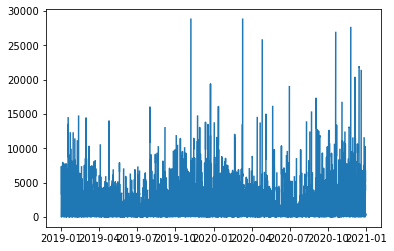

In [3]:
df['ventilation'] = df['wsp'] * df['PBLH']

plt.plot(df['ventilation'])
print(df['ventilation'].idxmax())
print(df['PBLH'])

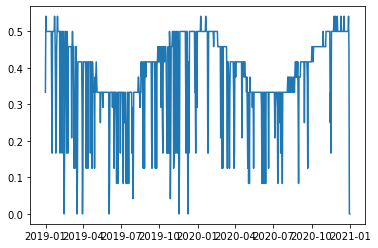

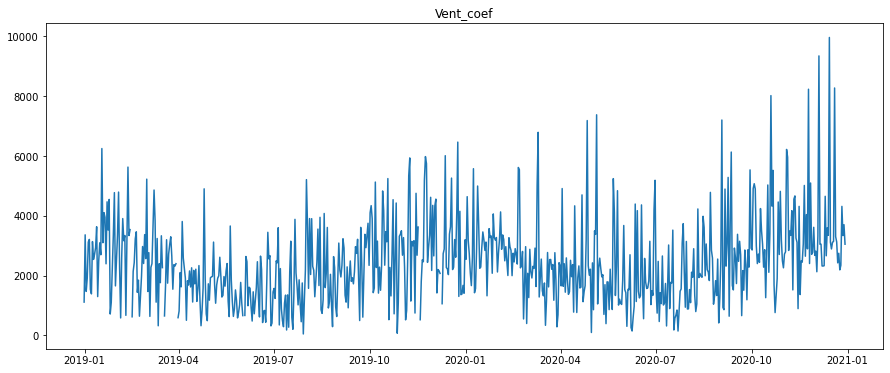

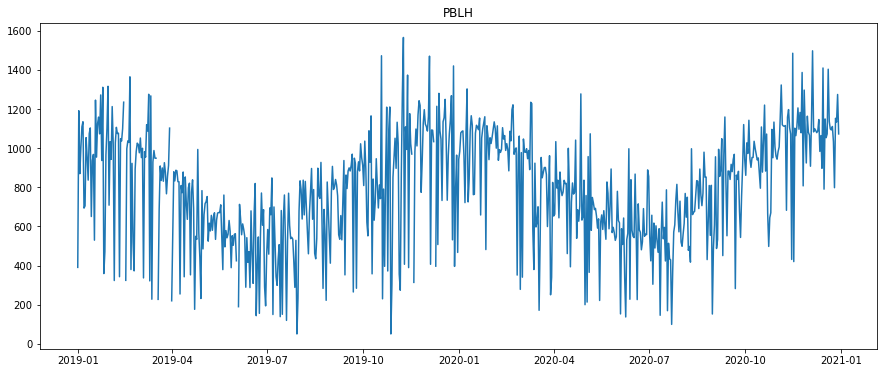

2019-07-29 12:00:00


In [6]:
df_daily_sum = df.resample(rule="24H", offset="12H").sum()

#display(df_daily_sum)



# Mean resample with a max of 6 NaN in PBLH
# Add a column with 1 if data is not NaN, 0 if data is NaN
df['data coverage'] = (~np.isnan(df['PBLH'])).astype(int)
df_daily_average = df.resample(rule="24H", offset="12H").mean()
# Specify a threshold on data coverage of 80% 
threshold = 0.74
#df_daily_average.loc[df['data coverage'] < threshold, 'values'] = np.NaN
#print(df_daily_average.head)
plt.plot(df_daily_average['data coverage'])
plt.show()
#display(df_daily_average)

plt.figure(figsize=(15,6))
plt.plot(df_daily_average['ventilation'])
plt.title('Vent_coef')
plt.show()
plt.figure(figsize=(15,6))
plt.title('PBLH')
plt.plot(df_daily_average['PBLH'])
plt.show()

print(df_daily_average['PBLH'].idxmin())

In [ ]:
for i in df.keys():
    print(i, max(df[i]), min(df[i]))

#plt.plot(df['ventilation'])

plt.plot(df['PBLH']*1)

In [ ]:
d = {'Precip': df_daily_sum['precip_rate'], 'HR': df_daily_average['RH'], 'T': df_daily_average['T'], 'ventil_coef': df_daily_average['wsp'] * df_daily_average}
df_out = pd.DataFrame()
